In [30]:
import os
import csv
import numpy as np
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt

In [31]:
base = 3

In [32]:
rc('font', size=12, **{'family': 'serif', 'serif': ['Times New Roman']})

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

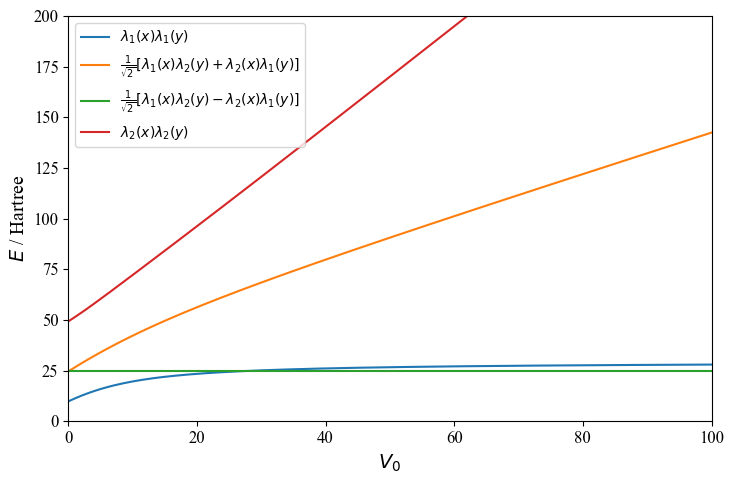

In [33]:
labels = [r'$\lambda_1(x) \lambda_1(y)$',
          r'$\frac{1}{\sqrt{2}} \left[\lambda_1(x) \lambda_2(y) + \lambda_2(x) \lambda_1(y)\right]$',
          r'$\frac{1}{\sqrt{2}} \left[\lambda_1(x) \lambda_2(y) - \lambda_2(x) \lambda_1(y)\right]$',
          r'$\lambda_2(x) \lambda_2(y)$']

folders = [folder for folder in os.listdir() if '.' not in folder]

rows = 1
columns = 1

fig, axs = plt.subplots(rows, columns, figsize=(7.5, 5))


for n, folder in enumerate(folders):
    files = [file for file in os.listdir(folder) if file.endswith(f'N={base}.csv')]
    files = sorted(files, key=ordenar_por_numero)

    for i, file in enumerate(files):
        N = int(file.split('=')[1].split('.')[0])

        df = pd.read_csv(f'results_1 (V large)/N={base}.csv')
        if base == 3:
            df = df.reindex(columns=['v0', 'energy_0', 'energy_1', 'energy_3', 'energy_2'])

        V_0  = df['v0'].to_list()
        
        for i, col in enumerate(df.columns[1:]):
            energy = df[col].to_list()
            axs.plot(V_0, energy, label=labels[i])
            # axs.set_title(f'$N = {N}$', fontsize=16)
            axs.set_xlabel('$V_0$', fontsize=14)
            axs.set_ylabel('$E$ / Hartree', fontsize=14)
            axs.grid(False)
            axs.legend(loc='upper left', fontsize='small')
            axs.set_xlim(0, 100)
            axs.set_ylim(0, 200)


plt.tight_layout()
plt.savefig(f'{folder}/potential_well_classic_saturation_N={base}_plot.png')
plt.savefig(f'../../../TFG/Figuras/potential_well_classic_saturation_N={base}_plot.png')
plt.show()